# Vahicle Insurance Dataset - Classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
sns.set(style='whitegrid')

In [49]:
vehicle = pd.read_csv("F:\\data science\\vehicle insurance dataset-classification\\data\\train.csv")
vehicle2 = pd.read_csv("F:\\data science\\vehicle insurance dataset-classification\\data\\test.csv")

# EDA on vehicle dataset

In [53]:
vehicle2 = pd.read_csv("F:\\data science\\vehicle insurance dataset-classification\\data\\test.csv")
vehicle2.head()


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [3]:
vehicle.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [4]:
vehicle.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [5]:
vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [6]:
vehicle.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


# outliers

In [7]:
Q1=vehicle.describe().loc["25%","Age"]
Q3=vehicle.describe().loc["75%","Age"]
IQR=Q3-Q1
print(vehicle.loc[vehicle["Age"]<(Q1-IQR*1.5),"Age"].count())
print(vehicle.loc[vehicle["Age"]<(Q3-IQR*1.5),"Age"].count())


0
0


there is on outliers in 'age'

In [8]:
Q1=vehicle.describe().loc["25%","Vintage"]
Q3=vehicle.describe().loc["75%","Vintage"]
IQR=Q3-Q1
print(vehicle.loc[vehicle["Age"]<(Q1-IQR*1.5),"Vintage"].count())
print(vehicle.loc[vehicle["Age"]<(Q3-IQR*1.5),"Vintage"].count())

0
0


there is no outliers in 'vintage'

In [9]:
vehicle["Gender"]=vehicle["Gender"].str.strip()
vehicle["Vehicle_Age"]=vehicle["Vehicle_Age"].str.strip()
vehicle["Vehicle_Damage"]=vehicle["Vehicle_Damage"].str.strip()

In [10]:
vehicle["Gender"]=vehicle["Gender"].str.lower()
vehicle["Vehicle_Age"]=vehicle["Vehicle_Age"].str.lower()
vehicle["Vehicle_Damage"]=vehicle["Vehicle_Damage"].str.lower()

creating dummies

In [11]:
Gender=pd.get_dummies(vehicle['Gender'])
Gender

,female,male
0,0,1
1,0,1
2,0,1
3,0,1
4,1,0
...,...,...
381104,0,1
381105,0,1
381106,0,1
381107,1,0


In [12]:
Age=pd.get_dummies(vehicle['Vehicle_Age'],)
Age

,1-2 year,< 1 year,> 2 years
0,0,0,1
1,1,0,0
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
381104,1,0,0
381105,0,1,0
381106,0,1,0
381107,0,0,1


In [13]:
vehicle=vehicle.rename(columns={"Yes": "1","No":"2"})

In [14]:
vehicle=vehicle.rename(columns={"Vehicle_Damage": "Vehicle_Damage_Yes"})

In [15]:
vehicle.drop(labels=['id','Gender','Vehicle_Age'],axis=1,inplace=True)
vehicle

,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage_Yes,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,44,1,28.0,0,yes,40454.0,26.0,217,1
1,76,1,3.0,0,no,33536.0,26.0,183,0
2,47,1,28.0,0,yes,38294.0,26.0,27,1
3,21,1,11.0,1,no,28619.0,152.0,203,0
4,29,1,41.0,1,no,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...
381104,74,1,26.0,1,no,30170.0,26.0,88,0
381105,30,1,37.0,1,no,40016.0,152.0,131,0
381106,21,1,30.0,1,no,35118.0,160.0,161,0
381107,68,1,14.0,0,yes,44617.0,124.0,74,0


In [28]:
vehicle.drop(labels=['Vehicle_Damage_Yes'],axis=1,inplace=True)

In [29]:
vehicle

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,44,1,28.0,0,40454.0,26.0,217,1
1,76,1,3.0,0,33536.0,26.0,183,0
2,47,1,28.0,0,38294.0,26.0,27,1
3,21,1,11.0,1,28619.0,152.0,203,0
4,29,1,41.0,1,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...
381104,74,1,26.0,1,30170.0,26.0,88,0
381105,30,1,37.0,1,40016.0,152.0,131,0
381106,21,1,30.0,1,35118.0,160.0,161,0
381107,68,1,14.0,0,44617.0,124.0,74,0


In [30]:
train=pd.concat([vehicle,Age,Gender],axis=1)

In [31]:
train

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,1-2 year,< 1 year,> 2 years,female,male
0,44,1,28.0,0,40454.0,26.0,217,1,0,0,1,0,1
1,76,1,3.0,0,33536.0,26.0,183,0,1,0,0,0,1
2,47,1,28.0,0,38294.0,26.0,27,1,0,0,1,0,1
3,21,1,11.0,1,28619.0,152.0,203,0,0,1,0,0,1
4,29,1,41.0,1,27496.0,152.0,39,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
381104,74,1,26.0,1,30170.0,26.0,88,0,1,0,0,0,1
381105,30,1,37.0,1,40016.0,152.0,131,0,0,1,0,0,1
381106,21,1,30.0,1,35118.0,160.0,161,0,0,1,0,0,1
381107,68,1,14.0,0,44617.0,124.0,74,0,0,0,1,1,0


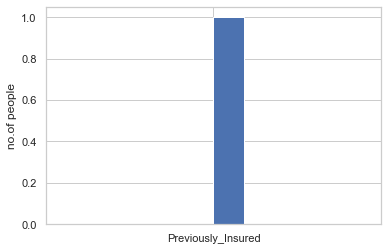

In [32]:
%matplotlib inline
plt.hist('Previously_Insured')
#plt.xlabel('yes or no')
plt.ylabel('no.of people')
plt.show()

# descriptive statistics on vehicle insurance dataset

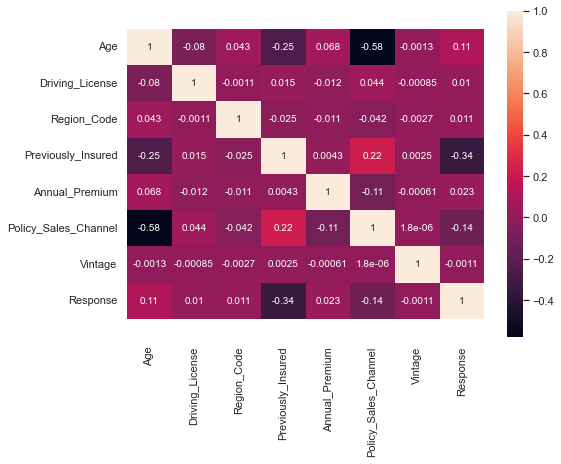

In [33]:
plt.figure(figsize=(8, 6))
cor = vehicle.corr()
ax = sns.heatmap(cor,annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

<AxesSubplot:xlabel='Response', ylabel='Age'>

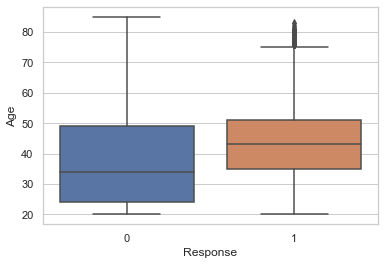

In [34]:
sns.boxplot(x=vehicle.Response,y=vehicle.Age)

<AxesSubplot:xlabel='Response', ylabel='Annual_Premium'>

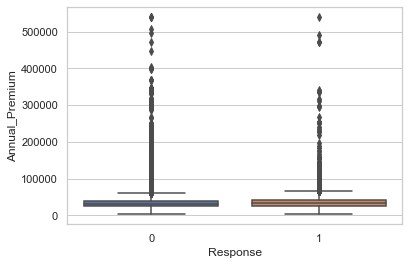

In [35]:
 sns.boxplot(x=vehicle.Response,y=vehicle.Annual_Premium)

<AxesSubplot:xlabel='Previously_Insured', ylabel='Vintage'>

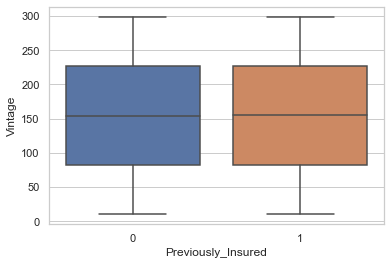

In [38]:
sns.boxplot(x=vehicle.Previously_Insured,y=vehicle.Vintage)

In [39]:
with open('EDA_Vehicledata.pkl', 'wb') as f:
    pickle.dump(vehicle, f)

# clasification model and train and test

In [40]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
# from catboost import CatBoostClassifier
from scipy.stats import randint
import pickle
# import xgboost as xgb
# import lightgbm as lgb
from sklearn.metrics import accuracy_score
# import packages for hyperparameters tuning
# from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, KFold, GridSearchCV
from sklearn.metrics import f1_score, roc_auc_score,accuracy_score,confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, classification_report

In [41]:
from sklearn.model_selection import train_test_split

train_target=train['Response']
train=train.drop(['Response'], axis = 1)
x_train,x_test,y_train,y_test = train_test_split(train,train_target, test_size=0.3, random_state = 0)


In [42]:
x_train.shape ,x_test.shape ,y_train.shape ,y_test.shape

((266776, 12), (114333, 12), (266776,), (114333,))

# DECISSION TREE CLASSIFIER

In [43]:
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [44]:
y_pred=dtc.predict(x_test)

In [45]:
pickle.dump(dtc, open('dtc_model.pkl', 'wb'))

In [46]:
from sklearn.metrics import accuracy_score,classification_report

print("Accuracy Score: ",accuracy_score(y_pred,y_test))
print("\n")
print(classification_report(y_pred,y_test))

Accuracy Score:  0.8213114323948466


              precision    recall  f1-score   support

           0       0.89      0.90      0.90     99515
           1       0.30      0.29      0.29     14818

    accuracy                           0.82    114333
   macro avg       0.60      0.59      0.60    114333
weighted avg       0.82      0.82      0.82    114333



In [47]:
pd.DataFrame(confusion_matrix(y_test,y_pred),columns=['Predicted No','Predicted Yes'],index=['Actual No','Actual Yes'])

,Predicted No,Predicted Yes
Actual No,89663,10578
Actual Yes,9852,4240


In [48]:
with open('dtc_model.pkl', 'wb') as f:
    pickle.dump(dtc, f)